# Converting seurat objects to scanpy

In [1]:
DIR="/vast/scratch/users/mueller.h/hackathon"
#source("/Users/harrisonm/data/WEHI/Conferences/OZSC_Hackathon/scripts/st_python/r/utils.R")
#source("/Users/harrisonm/data/WEHI/Conferences/OZSC_Hackathon/scripts/st_python/r/transfer.R")

# Load libraries

In [2]:
library(Seurat)
library(harmony)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Rcpp



### load RDS

In [31]:
atac <- readRDS(file.path(DIR, "data", "qc", "Annotated_processed_unpaired_ATAC.RDS"))
rna <- readRDS(file.path(DIR, "data", "qc", "processed_Annotated_unpaired_RNA.RDS"))

In [35]:
# add metadata
rna@meta.data["modality"] = "rna"
atac@meta.data["modality"] = "atac"

rna@meta.data["clusters"] = rna@meta.data["seurat_clusters"]
rna@meta.data["cell_type"] = rna@meta.data["Celltype"]

atac@meta.data["clusters"] = atac@meta.data["seurat_clusters"]
atac@meta.data["cell_type"] = atac@meta.data["Celltype"]

rna$modality = "rna"
atac$modality = "atac"

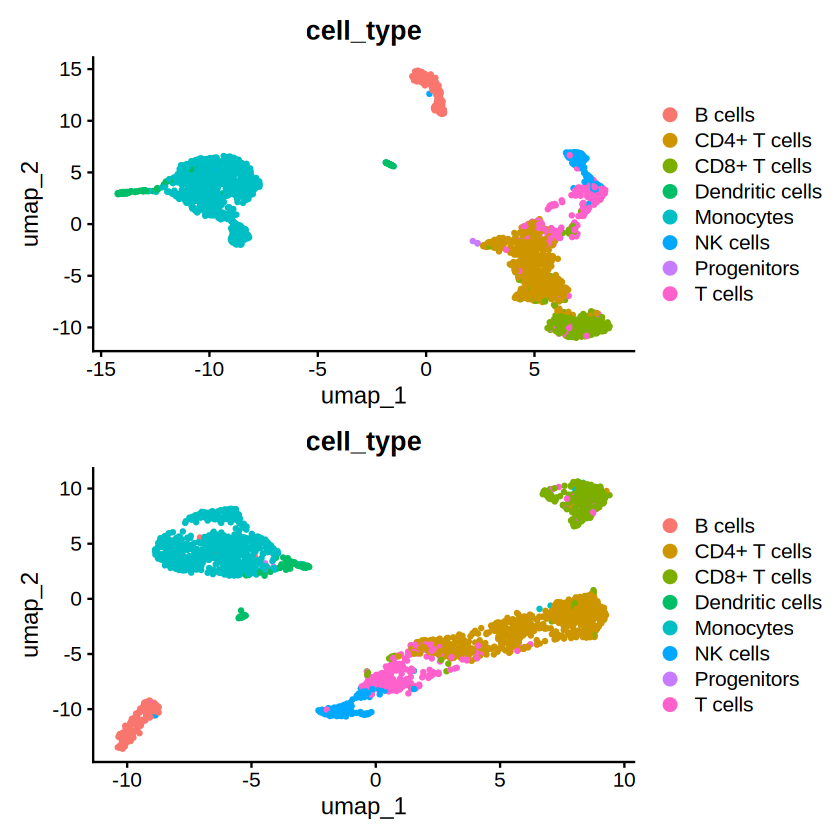

In [36]:
DimPlot(rna, group.by = "cell_type") / DimPlot(atac, group.by = "cell_type")

## calculate different embeddings

## harmony

In [37]:
# create combined metadata and embeddings
cols_to_keep = c("modality", "clusters", "cell_type")
meta = rbind(rna@meta.data[,cols_to_keep], atac@meta.data[,cols_to_keep])
head(meta)

pca_mat <- Embeddings(rna, "pca")[, 1:20]
lsi_mat <- Embeddings(atac, "lsi")[, 2:21]  # skip LSI 1, which often reflects sequencing depth

embed <- rbind(pca_mat, lsi_mat)
head(embed)

,modality,clusters,cell_type
,<chr>,<fct>,<chr>
AAACAGCCAAATATCC-1,rna,6,NK cells
AAACAGCCAGGAACTG-1,rna,0,Monocytes
AAACAGCCAGGCTTCG-1,rna,0,Monocytes
AAACCAACACCTGCTC-1,rna,5,B cells
AAACCAACAGATTCAT-1,rna,4,T cells
AAACCAACAGTTGCGT-1,rna,2,CD4+ T cells


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
AAACAGCCAAATATCC-1,8.580443,-4.160596,-15.538376,-15.468583,12.130099,0.6755310,-4.1490236,0.4767180,2.0913336,-5.0209922,4.8830071,1.8923778,-0.775623310,0.5147158,0.2183088,1.3122838,-1.1091343,-2.5056487,3.5797958,-1.1999502
AAACAGCCAGGAACTG-1,-17.130967,2.068117,-1.352230,-3.107783,-6.425426,-4.5057583,-2.8389076,-2.8547406,1.2926486,-1.1823351,-1.6354807,1.2684124,1.254506919,5.1897274,-2.8959249,0.3902635,-2.0483504,-0.3212725,-0.0190626,0.2272689
AAACAGCCAGGCTTCG-1,-19.819319,-2.613212,3.480622,4.955077,8.588627,1.7209091,0.8720928,2.2515918,-0.1383927,0.6817977,-1.0311053,-0.9400093,-0.073356871,-4.2637105,-0.9876673,-0.5647223,-0.8763640,0.2245276,0.1493009,0.5542551
AAACCAACACCTGCTC-1,6.377243,15.154342,6.683339,-4.742295,3.045329,-0.5700354,-1.6772153,0.2713507,6.3247608,3.1030492,-0.6541923,-1.9563096,-0.008638781,1.8650211,1.0157896,1.1634820,4.3081989,1.0693332,4.7417050,6.8164065
AAACCAACAGATTCAT-1,9.681480,-4.715767,-8.959457,-9.333708,7.045692,0.1900932,-1.6885692,-1.9841203,-1.2596142,1.1874742,-1.8257149,-1.3798337,2.720772526,1.2089035,2.0033412,-0.1287002,0.3865120,-1.1080431,2.7153246,-0.1268106
AAACCAACAGTTGCGT-1,9.993097,-2.626500,1.884136,1.896700,-1.762768,1.1456350,-1.7314018,0.4796268,-0.8640752,-0.5532302,1.3133298,-2.2142012,0.831420427,-0.4108829,0.2103582,-0.3044289,-0.1174866,1.4890207,-1.2643199,0.4618238


In [38]:
new_embed = HarmonyMatrix(embed, meta, "modality", do_pca = F, verbose = F)

new_row_names = paste0(rownames(new_embed), meta$modality)

# rename 
rownames(embed)= new_row_names
rownames(new_embed)= new_row_names
rownames(meta) = new_row_names

Warning message in HarmonyMatrix(embed, meta, "modality", do_pca = F, verbose = F):
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”


In [44]:
head(new_embed)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20
AAACAGCCAAATATCC-1rna,5.173203,-2.135369,-10.2879379,-10.8236153,8.957692,0.04595013,-4.2395904,0.4762568,1.4844621,-3.4194970,3.1193205,1.922594,-0.05626371,0.7581945,0.1325647,1.01251110,-1.0114912,-2.2032867,3.549658590,-1.0962336
AAACAGCCAGGAACTG-1rna,-9.143091,2.402109,-1.3805836,-2.8801180,-5.946071,-4.43998940,-2.6870989,-2.1840566,1.4158051,-1.3602483,-1.9284057,1.265084,1.34030063,4.7219584,-2.7456617,0.37251667,-2.0463127,-0.3361137,0.004322964,0.2301901
AAACAGCCAGGCTTCG-1rna,-11.560272,-1.724840,2.8832716,3.7987334,6.644656,1.34329348,0.7428321,1.8709929,-0.1183832,0.6496438,-0.9835833,-0.817012,-0.10599874,-4.0797649,-0.9715938,-0.63085171,-0.8250715,0.1892796,0.139904018,0.5548575
AAACCAACACCTGCTC-1rna,4.069036,7.380511,3.2394895,-1.9438052,1.387999,-0.66909422,-1.8349932,-0.5793239,5.1140786,2.2352505,-0.5812379,-2.071658,0.13849044,1.8384515,1.4960692,2.38607077,4.2221872,2.7722515,5.176577433,8.9242865
AAACCAACAGATTCAT-1rna,5.964087,-2.785455,-4.9725379,-5.5428642,4.557698,0.14855689,-1.8943131,-1.6452579,-0.9607960,0.9521344,-1.7448783,-1.151963,2.40259574,0.9126431,2.1355103,0.11219800,0.4763519,-1.0502934,3.005004558,-0.2162681
AAACCAACAGTTGCGT-1rna,5.801896,-1.640252,0.8767693,0.7118643,-1.272561,0.83132194,-1.2810531,0.7082248,-0.9587280,-0.2040544,1.0318378,-1.804803,0.59320048,-0.3670779,0.2438483,-0.08077131,-0.1751299,1.2800066,-1.198410848,0.4329182


In [39]:
so_old <- CreateSeuratObject(counts = t(embed), data = t(embed), meta.data = meta)
so_new <- CreateSeuratObject(counts = t(new_embed), data = t(new_embed), meta.data = meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [45]:
so_new

An object of class Seurat 
20 features across 5093 samples within 1 assay 
Active assay: RNA (20 features, 0 variable features)
 2 layers present: counts, data
 1 dimensional reduction calculated: umap

In [40]:
so_old <- RunUMAP(so_old, features = 1:20)
so_new <- RunUMAP(so_new, features = 1:20)

16:59:19 UMAP embedding parameters a = 0.9922 b = 1.112

16:59:19 Read 5093 rows and found 20 numeric columns

16:59:19 Using Annoy for neighbor search, n_neighbors = 30

16:59:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:59:19 Writing NN index file to temp file /tmp/Rtmp43SOm6/file96ff94f653779

16:59:19 Searching Annoy index using 1 thread, search_k = 3000

16:59:20 Annoy recall = 100%

16:59:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:59:23 Initializing from normalized Laplacian + noise (using RSpectra)

16:59:23 Commencing optimization for 500 epochs, with 202668 positive edges

16:59:23 Using rng type: pcg

16:59:30 Optimization finished

16:59:30 UMAP embedding parameters a = 0.9922 b = 1.112

16:59:30 Read 5093 rows and found 20 numeric columns

16:59:30 Using Annoy for neighbor search, n_neighbors = 30

16:59:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:59:31 Writing NN index file t

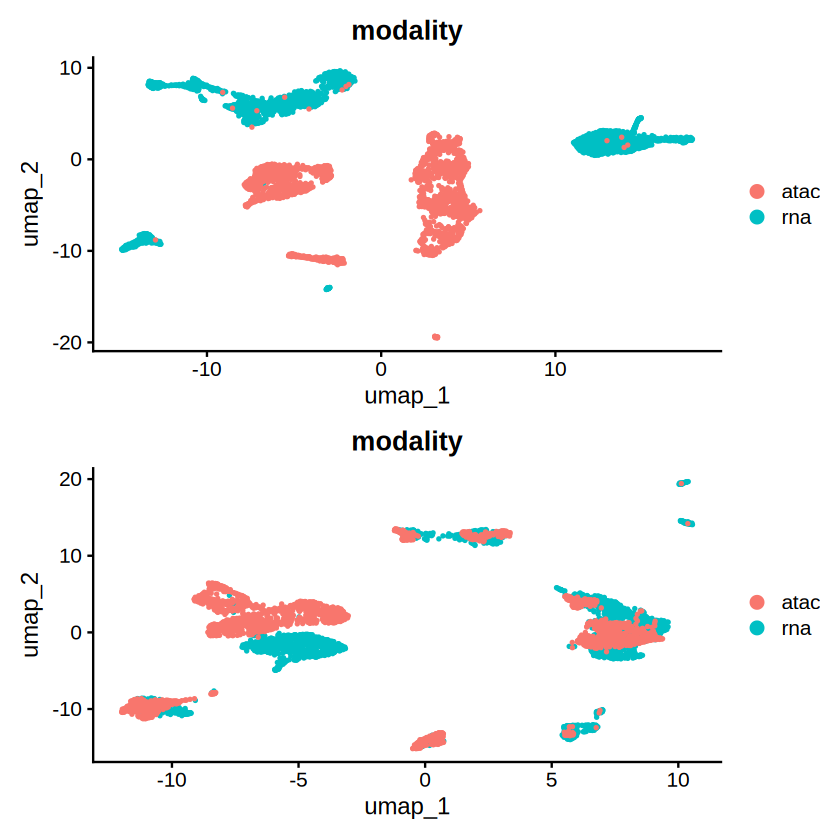

In [41]:
DimPlot(so_old, group.by = "modality") / DimPlot(so_new, group.by = "modality")

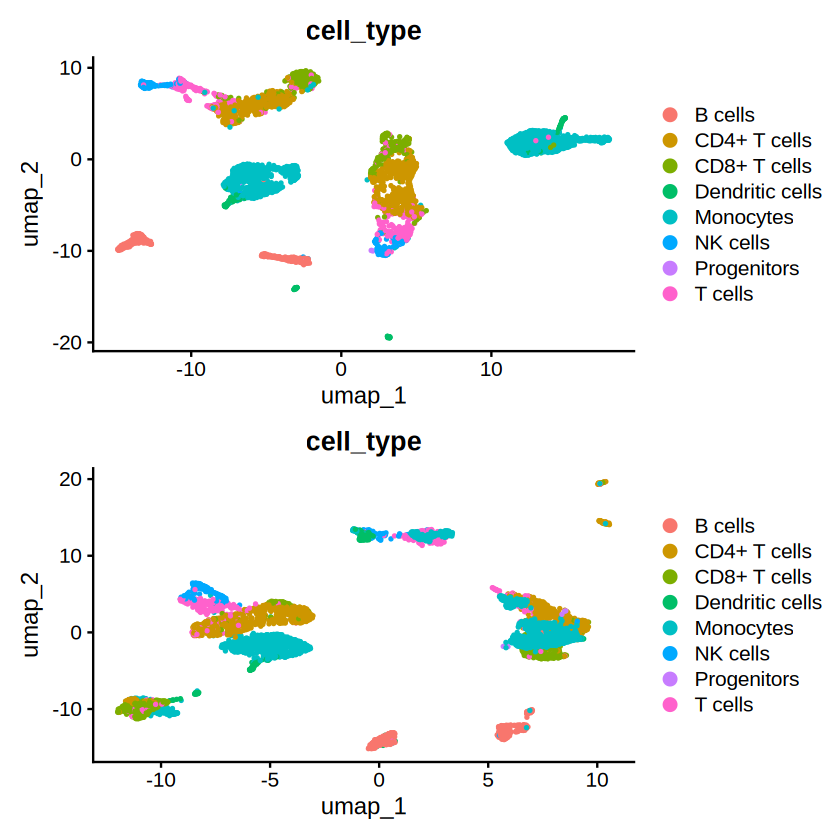

In [42]:
DimPlot(so_old, group.by = "cell_type") / DimPlot(so_new, group.by = "cell_type")

### save to file

In [13]:
out = file.path(DIR, "scripts", "hackathon_multiomic_embeddings", "results", "embeddings")

Warning message in data(so_new):
“data set ‘so_new’ not found”


In [20]:
write.table(t(GetAssayData(so_old, slot = "data")), file = file.path(out, "pca_lsi.tsv"), sep = "\t", quote = FALSE)
write.table(t(GetAssayData(so_new, slot = "data")), file = file.path(out, "harmony_pca_lsi.tsv"), sep = "\t", quote = FALSE)
write.table(so_new@meta.data, file = file.path(out, "metadata.tsv"), sep = "\t", quote = FALSE)

## Checking Harmony

In [94]:
combined <- merge(rna, y = atac, add.cell.ids = c("rna", "atac"),
  merge.data = TRUE)
combined

An object of class Seurat 
213357 features across 5093 samples within 3 assays 
Active assay: RNA (37176 features, 2000 variable features)
 5 layers present: counts.1, counts.2, data.1, scale.data.1, data.2
 2 other assays present: ATAC, ACTIVITY

In [96]:
combined <- RunPCA(combined)

PC_ 1 
Positive:  IL32, CD247, TRAC, CAMK4, LTB, IL7R, BACH2, LEF1, SYNE2, INPP4B 
	   BCL2, TRBC2, THEMIS, RORA, ANK3, TXK, CD69, TRBC1, MLLT3, TMSB4X 
	   RASGRF2, LINC01934, NELL2, TAFA1, ACTG1, PATJ, MAL, TMSB10, PCAT1, GZMM 
Negative:  PLXDC2, SLC8A1, FCN1, LRMDA, TYMP, JAK2, CYBB, MCTP1, DMXL2, NAMPT 
	   ZEB2, IRAK3, TBXAS1, RBM47, GAB2, LYN, LYZ, TLR2, VCAN, HCK 
	   LRRK2, MNDA, SAT1, LYST, CLEC7A, TNFAIP2, CSF3R, CD36, MARCH1, DENND1A 
PC_ 2 
Positive:  NIBAN3, IGHM, BANK1, AFF3, MS4A1, PAX5, BLK, FCRL1, CD79A, LINC00926 
	   COBLL1, OSBPL10, EBF1, RALGPS2, CD22, BLNK, BCL11A, SPIB, ADAM28, AP002075.1 
	   COL19A1, IGHD, CD79B, RUBCNL, WDFY4, DENND5B, TCF4, IGKC, RHEX, HLA-DQA1 
Negative:  IL32, CD247, TRAC, DPYD, IL7R, PDE3B, CAMK4, INPP4B, AOAH, THEMIS 
	   ANXA1, NEAT1, LEF1, FNDC3B, RORA, SLCO3A1, TXK, TRBC2, S100A4, TRBC1 
	   CTSW, ARHGAP26, GZMM, SRGN, PLCB1, ADGRE5, NCALD, LINC01934, SAMD3, SYNE2 
PC_ 3 
Positive:  BACH2, MS4A1, PAX5, LINC00926, BANK1, CD79A, FCRL1, E

In [97]:
dim(Embeddings(combined))

[1] 2530   50

In [91]:
# create combined metadata and embeddings
cols_to_keep = c("modality", "clusters", "cell_type")
meta = rbind(rna@meta.data[,cols_to_keep], atac@meta.data[,cols_to_keep])
rownames(meta) = paste(meta$modality, rownames(meta), sep="_")
head(meta)


,modality,clusters,cell_type
,<chr>,<fct>,<chr>
rna_AAACAGCCAAATATCC-1,rna,6,NK cells
rna_AAACAGCCAGGAACTG-1,rna,0,Monocytes
rna_AAACAGCCAGGCTTCG-1,rna,0,Monocytes
rna_AAACCAACACCTGCTC-1,rna,5,B cells
rna_AAACCAACAGATTCAT-1,rna,4,T cells
rna_AAACCAACAGTTGCGT-1,rna,2,CD4+ T cells


In [87]:
embed = Embeddings(combined)
new_embed = HarmonyMatrix(embed, meta, "modality", do_pca = F, verbose = F)

Warning message in HarmonyMatrix(embed, meta, "modality", do_pca = F, verbose = F):
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”


In [88]:
so_old <- CreateSeuratObject(counts = t(embed), data = t(embed), meta.data = meta)
so_new <- CreateSeuratObject(counts = t(new_embed), data = t(new_embed), meta.data = meta)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [89]:
so_old <- RunUMAP(so_old, features = 1:20)
so_new <- RunUMAP(so_new, features = 1:20)

17:35:11 UMAP embedding parameters a = 0.9922 b = 1.112

17:35:11 Read 5093 rows and found 20 numeric columns

17:35:11 Using Annoy for neighbor search, n_neighbors = 30

17:35:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:35:12 Writing NN index file to temp file /tmp/Rtmp43SOm6/file96ff941afb3a6

17:35:12 Searching Annoy index using 1 thread, search_k = 3000

17:35:13 Annoy recall = 100%

17:35:14 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:35:15 Initializing from normalized Laplacian + noise (using RSpectra)

17:35:16 Commencing optimization for 500 epochs, with 213006 positive edges

17:35:16 Using rng type: pcg

17:35:23 Optimization finished

17:35:23 UMAP embedding parameters a = 0.9922 b = 1.112

17:35:23 Read 5093 rows and found 20 numeric columns

17:35:23 Using Annoy for neighbor search, n_neighbors = 30

17:35:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:35:24 Wri

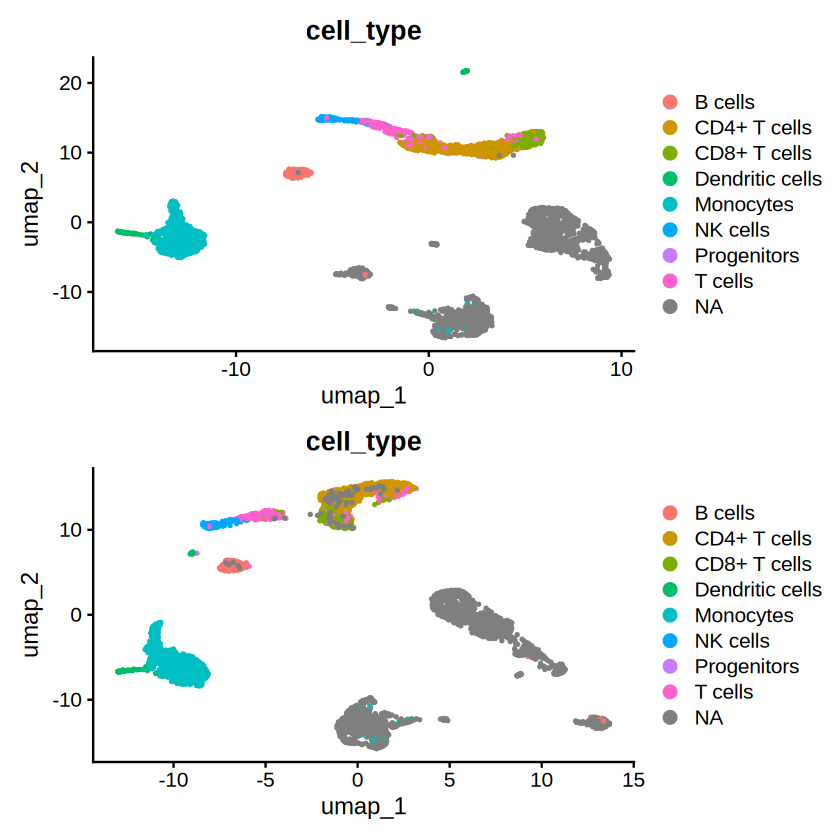

In [93]:
DimPlot(so_old, group.by = "cell_type") / DimPlot(so_new, group.by = "cell_type")